<a href="https://colab.research.google.com/github/XavierRG0417/Financas-Quantitativas---Python/blob/main/An%C3%A1lise_Quantitativa_de_Investimentos_Otimiza%C3%A7%C3%A3o_de_Portf%C3%B3lio_de_Markowitz_com_Simula%C3%A7%C3%A3o_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Quantitativa de Investimentos: Otimização de Portfólio de Markowitz com Simulação de Monte Carlo
##**Sobre o Projeto:**
Este projeto busca aplicar métodos quantitativos de análise financeira para otimizar uma carteira de investimentos. Utilizamos a Teoria de Carteira de Markowitz, um pilar na área de finanças, juntamente com a Simulação de Monte Carlo, um método estatístico, para analisar e simular cenários de investimento.

Para quem é este projeto?
Investidores que buscam uma forma mais técnica de avaliar suas opções de investimento.
Estudantes e profissionais da área de finanças, especialmente aqueles interessados em finanças quantitativas.
Qualquer pessoa interessada em entender como as matemáticas e estatísticas podem ser aplicadas no mundo dos investimentos.
Por que essas análises são importantes?
Otimização de Carteira de Markowitz
A Teoria da Carteira de Markowitz sugere que é possível criar um 'portfólio ótimo' que oferece o máximo de retorno para um dado nível de risco. Em outras palavras, ao invés de olhar para o potencial de retorno de um único investimento, Markowitz propõe que devemos olhar para o nosso portfólio como um todo. A ideia é diversificar, misturando ativos que não estão correlacionados, para minimizar o risco sem sacrificar os retornos.

Simulação de Monte Carlo
A Simulação de Monte Carlo permite analisar cenários incertos de forma quantitativa. Este método utiliza simulações computacionais para modelar a probabilidade de diferentes resultados em um processo onde a incerteza está presente. Isso é extremamente útil no mundo dos investimentos, onde há uma série de fatores imprevisíveis que podem afetar o desempenho de uma carteira.

Como utilizar este projeto
O código deste projeto foi escrito em Python e faz uso de várias bibliotecas para análise de dados e visualização. Instruções para instalação e execução estão disponíveis no arquivo INSTALL.md.

Contribuições
Este é um projeto de código aberto, e contribuições são bem-vindas! Sinta-se à vontade para abrir um 'issue' ou fazer um 'pull request'.

Licença
Este projeto está licenciado sob a Licença MIT - consulte o arquivo LICENSE.md para mais detalhes.


###Introdução às bibliotecas usadas

Este projeto faz uso de várias bibliotecas Python para coletar, analisar e visualizar dados. Aqui está uma breve descrição de cada uma:

pandas: é uma biblioteca poderosa e flexível para a manipulação de dados. Ela fornece estruturas de dados eficientes para manipular e analisar dados tabulares e séries temporais.

numpy: é uma biblioteca que fornece suporte para arrays e matrizes de grande dimensão, juntamente com uma coleção de funções matemáticas para operar nesses arrays.

matplotlib: é uma biblioteca de plotagem para a linguagem de programação Python e sua extensão matemática NumPy. Ela fornece uma maneira de criar gráficos estáticos, animados e interativos.

seaborn: é uma biblioteca de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

yfinance: é uma biblioteca Python para extrair dados históricos do mercado de ações do Yahoo Finance. Ela permite que os usuários baixem dados de ações usando tanto o símbolo da ação quanto o intervalo de datas.

mplfinance: é uma biblioteca para criar gráficos financeiros no estilo de castiçal (candlestick). Ela é uma extensão da matplotlib e oferece uma maneira conveniente de visualizar dados financeiros.

scipy.stats: é um módulo da biblioteca SciPy que contém muitas funções de distribuição de probabilidade, estatísticas sumárias e inferenciais, e testes estatísticos.

matplotlib.gridspec: é um módulo que especifica a localização das subparcelas em uma parcela. Ele é particularmente útil quando os subplots têm diferentes tamanhos dentro da mesma figura.

Antes de usar as bibliotecas, é preciso instalá-las. A instalação é feita através do gerenciador de pacotes pip, como demonstrado na linha de comando !pip install mplfinance. O prefixo '!' permite que comandos shell sejam executados a partir do notebook.

In [1]:
# Importando bibliotecas para o script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
import matplotlib.gridspec as gridspec

Neste trecho do código, especificamos os parâmetros iniciais para a nossa análise:

tickers: Uma lista com os códigos das ações (tickers) que serão analisadas. Neste caso, estamos incluindo empresas como Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), etc.
start_date e end_date: As datas de início e término para o período de análise dos dados históricos dessas ações.
Isso basicamente configura o universo de investimentos e o horizonte temporal que o modelo vai considerar para a otimização do portfólio.
As empresas analisadas foram selecionadas aleatóriamente do mercado de ações americano visando a diversificação dos setores da economia, como tecnologia, varejo, mercado financeiro etc..

Apple Inc. (AAPL)

Microsoft Corporation (MSFT)

Amazon.com Inc. (AMZN)

Tesla Inc. (TSLA)

JPMorgan Chase & Co. (JPM)

The Goldman Sachs Group, Inc. (GS)

Johnson & Johnson (JNJ)

Chevron Corporation (CVX)

Procter & Gamble Co. (PG)

In [2]:
# Entrada de tickers e datas
tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA','JPM', 'GS', 'JNJ', 'CVX', 'PG' ]
start_date = '2013-9-20'
end_date = '2023-9-20'

### Criação da funação de obtenção dos preços dos ativos
O código abaixo define uma função chamada get_price_data, que pega uma lista de tickers como argumento e retorna os dados de preços correspondentes.
A função get_price_data usa a função yf.download da biblioteca yfinance para baixar os dados do mercado de ações para os tickers especificados. Ele usa as datas de início e fim inseridas pelo usuário para determinar o período de tempo para o qual baixar os dados.

O código dados = get_price_data(tickers) executa a função get_price_data com a lista de tickers inseridos pelo usuário, e armazena o DataFrame de dados resultante na variável dados.

In [9]:
def get_price_data(ticker):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.dropna(how='any', inplace=True)  # removendo linhas com qualquer valor NaN (nulos)
    return data

data = get_price_data(tickers)
data.head() # Visualizar as 5 priemiras linhas do Dataframe

[*********************100%%**********************]  9 of 9 completed


Adj Close                                                        \
                 AAPL     AMZN        CVX          GS        JNJ        JPM   
Date                                                                          
2013-09-20  14.569020  15.8170  82.270729  141.540344  68.380531  39.939270   
2013-09-23  15.293095  15.5745  82.665901  137.788116  67.930664  38.925636   
2013-09-24  15.245093  15.7065  81.987526  135.887024  67.267303  38.063309   
2013-09-25  15.009131  15.6325  81.710930  135.336731  66.398087  39.107189   
2013-09-26  15.155323  15.9060  81.328941  135.320038  66.390419  39.250885   

                                                 Close  ...       Open  \
                 MSFT         PG       TSLA       AAPL  ...       TSLA   
Date                                                    ...              
2013-09-20  27.458834  59.456409  12.226000  16.693214  ...  11.926667   
2013-09-23  27.416960  59.374035  12.074000  17.522858  ...  12.298667   
2013-09-24  27.174103  58.879761  12.155333  17.467857  ...  11.942667   
2013-09-25  27.224354  58.205727  12.349333  17.197500  ...  12.237333   
2013-09-26  27.442083  58.452873  12.576000  17.365000  ...  12.446667   

               Volume                                                     \
                 AAPL       AMZN       CVX        GS       JNJ       JPM   
Date                                                                       
2013-09-20  699302800  106046000  10264700  20410100  14708600  30792200   
2013-09-23  762106800   37698000   5450600   4816200   7376200  28189500   
2013-09-24  364344400   40672000   6097900   3422600   7797500  34906900   
2013-09-25  316957200   40172000   4498900   3614600   7493200  39175500   
2013-09-26  237221600   39798000   5022600   2711400   6400600  22298700   

                                            
                 MSFT        PG       TSLA  
Date                                        
2013-09-20  102904900  11146100  201025500  
2013-09-23   39826100   6304900  122601000  
2013-09-24   40685000   7692100   94101000  
2013-09-25   28907500   7589300  123790500  
2013-09-26   28504000   4632600   99216000  

[5 rows x 54 columns]

Para ver a lista de todas as colunas do Dataframe e os tipos de dados que compôem a tabela criada basta utilizar a função data.info()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-09-20 to 2023-09-19
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2516 non-null   float64
 1   (Adj Close, AMZN)  2516 non-null   float64
 2   (Adj Close, CVX)   2516 non-null   float64
 3   (Adj Close, GS)    2516 non-null   float64
 4   (Adj Close, JNJ)   2516 non-null   float64
 5   (Adj Close, JPM)   2516 non-null   float64
 6   (Adj Close, MSFT)  2516 non-null   float64
 7   (Adj Close, PG)    2516 non-null   float64
 8   (Adj Close, TSLA)  2516 non-null   float64
 9   (Close, AAPL)      2516 non-null   float64
 10  (Close, AMZN)      2516 non-null   float64
 11  (Close, CVX)       2516 non-null   float64
 12  (Close, GS)        2516 non-null   float64
 13  (Close, JNJ)       2516 non-null   float64
 14  (Close, JPM)       2516 non-null   float64
 15  (Close, MSFT)      2516 non-null   float64
 16  (Close

###Plotagem do Gráfico de Preços de Fechamento Ajustados das Ações

Usando os preços armazenados no Dataframe, podemos plotar a evolução dos preços dos ativos fornecidos pelo yahoo finance

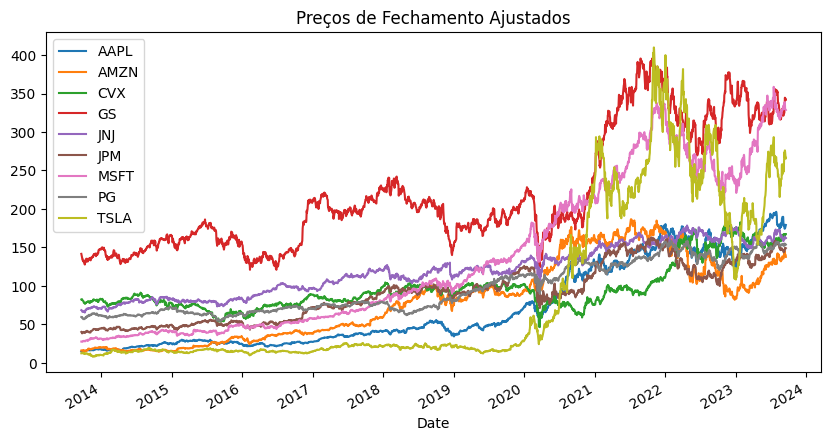

In [5]:
data['Adj Close'].plot(figsize=(10, 5))
plt.title('Preços de Fechamento Ajustados')
plt.show()

###Plotagem do Gráfico de Preços de Fechamento Ajustados das Ações em Sscala Logarítimica:
O gráfico de preços de fechamento ajustados em escala logarítimica tem o objetivo de apresentar as variações percentuais do preço da ação ao longo do tempo de uma forma mais fácil de entender e analisar. Em uma escala linear, as mudanças de preço são mostradas de forma absoluta, o que pode ser enganoso quando se lida com ativos que tiveram um crescimento exponencial ou declínio ao longo de um período prolongado.

Vantagens:
Comparabilidade Percentual: Em uma escala logarítimica, um deslocamento vertical igual representa uma variação percentual constante. Isso torna mais fácil comparar o desempenho relativo das ações ao longo do tempo.

Identificação de Padrões: A escala logarítimica pode tornar mais fácil identificar padrões de tendência e outras características que poderiam ser menos visíveis em uma escala linear.

Redução do Viés Visual: Para ativos com crescimento ou declínio exponencial, a escala logarítimica pode oferecer uma representação mais equilibrada, reduzindo o viés visual que pode ocorrer ao olhar para um gráfico em escala linear.

Melhor para Análise de Longo Prazo: Para análises de investimento de longo prazo, onde os retornos compostos e o crescimento exponencial são relevantes, a escala logarítimica pode ser mais apropriada.


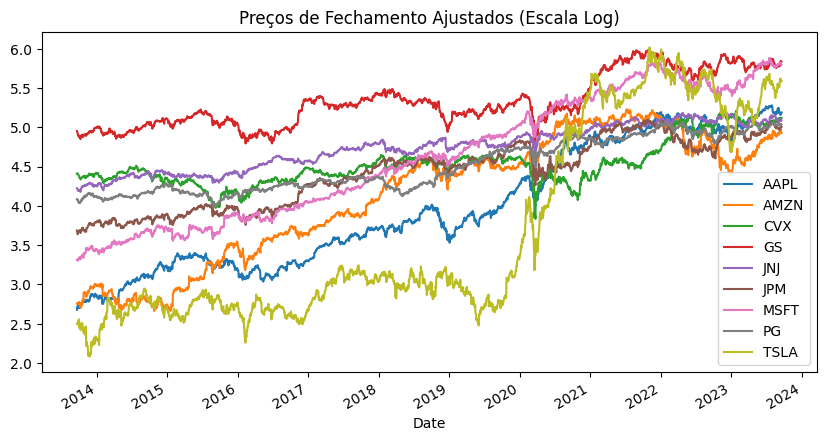

In [12]:
log_prices = np.log(data['Adj Close'])
log_prices.plot(figsize=(10, 5))
plt.title("Preços de Fechamento Ajustados (Escala Log)")
plt.show()

### Normalizando os dados
O objetivo deste gráfico é mostrar como os preços das ações selecionadas se comportaram em relação ao seu preço inicial durante o período analisado. O preço inicial de cada ação é normalizado para 1, e todos os preços subsequentes são apresentados como uma proporção em relação a esse preço inicial.

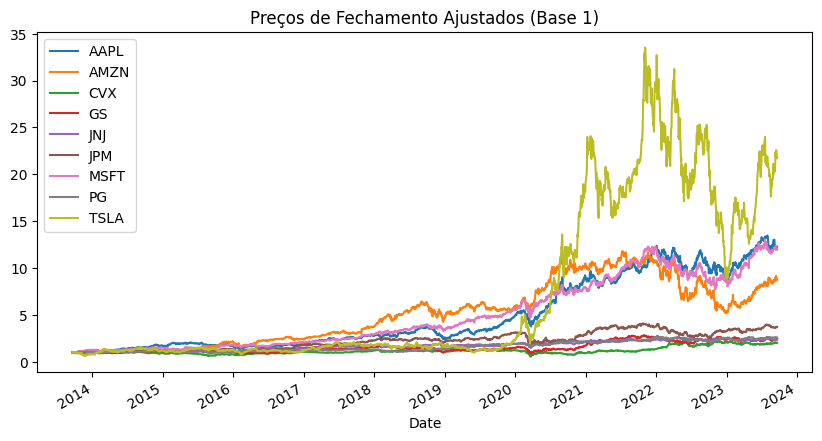

In [11]:
norm_prices = data['Adj Close'] / data['Adj Close'].iloc[0]
norm_prices.plot(figsize=(10, 5))
plt.title("Preços de Fechamento Ajustados (Base 1)")
plt.show()

###Estatísticas Descritivas dos Ativos
Ao analisar o desempenho de qualquer portfólio, é crucial entender as métricas-chave dos ativos individuais que compõem esse portfólio. Abaixo estão as estatísticas descritivas para as ações da AAPL, AMZN, CVX, GS, JNJ, JPM, MSFT, PG e TSLA durante o período observado:

Count: O número de observações é uniforme para todos os ativos, com 2518 observações. Isso nos dá uma boa base para comparar o desempenho dos ativos.


Mean (Média): A média nos dá uma ideia do valor "central" para cada ativo ao longo do período. Por exemplo, AAPL tem uma média de aproximadamente 71.20, enquanto AMZN  é de cerca de 80.84.

Standard Deviation (Desvio Padrão): Esta métrica indica a volatilidade do ativo. Quanto maior o desvio padrão, mais arriscado é o ativo. TSLA, por exemplo, tem um desvio padrão de aproximadamente 106.31, indicando maior volatilidade.

Min e Max: Estes valores mostram o alcance de variação do preço do ativo. Saber isso é importante para entender o potencial de crescimento ou queda. A TSLA variou de 8.03 a 409.97, o que é um alcance significativo.

Quartis (25%, 50%, 75%): Os quartis dividem o conjunto de dados em quatro partes iguais e são úteis para entender a dispersão dos dados. Por exemplo, 75% das observações de AAPL estão abaixo de 125.97, mas para MSFT, esse valor é de 229.30.

Por que isso é importante?

Seleção de Ativos: Entender essas métricas ajuda na escolha de ativos que alinham com a sua estratégia de investimento. Se você é avesso ao risco, talvez queira evitar ativos com alto desvio padrão.

Diversificação: As estatísticas descritivas oferecem insights sobre como diversificar seu portfólio. Por exemplo, se você já possui ativos com alta média e baixo desvio padrão, talvez queira explorar ativos que ofereçam um perfil de risco-retorno diferente.

Otimização de Portfólio: Finalmente, esses números fornecerão os insumos essenciais para os modelos de otimização de portfólio, como o Modelo de Markowitz e a Simulação de Monte Carlo, que planejamos usar mais adiante no projeto.

In [ ]:
data['Adj Close'].describe()

,AAPL,AMZN,CVX,GS,JNJ,JPM,MSFT,PG,TSLA
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,71.195097,80.837698,96.297395,218.431789,118.744740,90.001055,135.642541,95.738606,87.361626
std,54.506670,51.682652,29.701179,75.753411,31.651910,35.681511,98.018537,32.529154,106.313378
min,14.030098,14.347500,46.292015,120.815323,65.277176,38.063316,27.174107,54.238663,8.033333
25%,26.331459,32.957998,77.112818,159.083195,87.920799,52.835681,47.345060,67.048574,15.350667
50%,44.218395,83.167252,88.483360,195.519791,117.083038,90.805668,100.302303,78.620544,21.024667
75%,125.969938,120.184628,100.256996,286.686562,150.787975,118.234852,229.302135,128.377087,182.889996
max,196.185074,186.570496,182.584579,401.437286,178.456894,162.897018,358.730469,158.212952,409.970001


###Estatísticas do Volume de Negociações dos Ativos
O volume de negociações é outro indicador vital quando se trata de entender o mercado financeiro. O volume pode influenciar tanto a volatilidade quanto a liquidez de um ativo. Vamos mergulhar nas principais métricas:

Count: Como nas estatísticas de preços, temos um total de 2516 observações para cada ativo, garantindo uma base consistente para comparações.

Mean (Média): A média do volume negociado varia bastante entre os ativos. Por exemplo, AAPL tem uma média de cerca de 144 milhões de ações negociadas, enquanto GS tem uma média de apenas cerca de 3 milhões. Essa variação sugere diferentes níveis de interesse dos investidores e liquidez entre os ativos.

Standard Deviation (Desvio Padrão): O desvio padrão do volume também varia significativamente. Ativos com maior desvio padrão em volume podem ver picos de atividade, talvez devido a eventos de notícias ou anúncios de ganhos.

Min e Max: Estes valores mostram a amplitude de variação do volume. Isso pode ajudar a entender o quão extremos podem ser os picos ou vales na atividade de negociação.

Quartis (25%, 50%, 75%): Eles nos dão uma imagem mais detalhada da distribuição do volume. Ativos com quartis mais elevados geralmente sugerem maior consistência na atividade de negociação.

Por que o Volume é Importante?
Liquidez: Ativos com volumes de negociação mais altos são geralmente mais líquidos, tornando mais fácil comprar ou vender posições sem impactar significativamente o preço.

Volatilidade: Grandes variações no volume frequentemente precedem mudanças significativas no preço. A análise do volume pode, portanto, fornecer um alerta antecipado sobre possíveis movimentos de preços.

Investidor Institucional: Volumes elevados podem indicar atividade de investidores institucionais, que têm poder para mover o mercado.

Diversificação e Risco: Entender o volume e como ele se relaciona com a volatilidade pode ajudar na diversificação e na gestão do risco do portfólio.

In [14]:
data['Volume'].describe()

,AAPL,AMZN,CVX,GS,JNJ,JPM,MSFT,PG,TSLA
count,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03,2.516000e+03
mean,1.442931e+08,8.038476e+07,8.301718e+06,3.029777e+06,7.769573e+06,1.491074e+07,3.059926e+07,8.307653e+06,1.147234e+08
std,9.042016e+07,4.172812e+07,4.331704e+06,1.471551e+06,6.028671e+06,6.574562e+06,1.427875e+07,5.379370e+06,7.726457e+07
min,3.145820e+07,1.762600e+07,1.587800e+06,4.677000e+05,2.114900e+06,3.220500e+06,7.425600e+06,2.022100e+06,1.062000e+07
25%,8.446858e+07,5.396750e+07,5.609975e+06,2.112100e+06,5.591250e+06,1.061855e+07,2.188125e+07,5.974000e+06,6.643185e+07
50%,1.167146e+08,6.891100e+07,7.190150e+06,2.696000e+06,6.750950e+06,1.330970e+07,2.727820e+07,7.208750e+06,9.313935e+07
75%,1.776326e+08,9.293850e+07,9.798200e+06,3.473725e+06,8.450000e+06,1.719285e+07,3.495940e+07,9.194875e+06,1.353589e+08
max,1.065523e+09,4.771220e+08,5.723100e+07,2.041010e+07,1.513195e+08,5.619230e+07,2.025224e+08,1.237357e+08,9.140820e+08


###Retornos Simples (Percentuais)
O método pct_change() calcula a variação percentual de um período para o outro, que é o retorno simples.

In [16]:
# Calculando os retornos diários simples
daily_returns = data['Adj Close'].pct_change()
daily_returns.head()

,AAPL,AMZN,CVX,GS,JNJ,JPM,MSFT,PG,TSLA
Date,,,,,,,,,
2013-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-23,0.049700,-0.015332,0.004803,-0.026510,-0.006579,-0.025379,-0.001525,-0.001385,-0.012432
2013-09-24,-0.003139,0.008475,-0.008206,-0.013797,-0.009765,-0.022153,-0.008858,-0.008325,0.006736
2013-09-25,-0.015478,-0.004711,-0.003374,-0.004050,-0.012922,0.027425,0.001849,-0.011448,0.015960
2013-09-26,0.009740,0.017496,-0.004675,-0.000123,-0.000115,0.003674,0.007998,0.004246,0.018355


Podemos plotar os retornos diários de todos os ativos para compreender o comportamento dos retornos

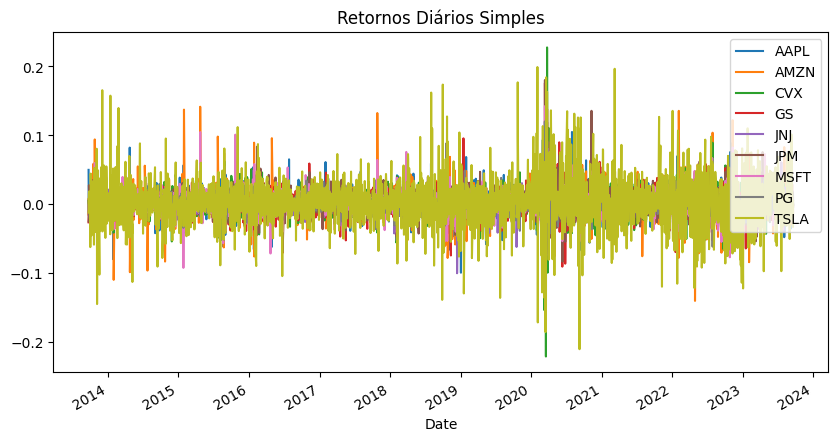

In [21]:
  daily_returns.plot(figsize=(10, 5))
  plt.title("Retornos Diários Simples")
  plt.show()

In [26]:
# Calculando a média dos retornos diários e mensais
mean_daily_returns = daily_returns.mean()
print("Retornos diários médios:")
mean_daily_returns*100

Retornos diários médios:


AAPL    0.115890
AMZN    0.107815
CVX     0.045353
GS      0.050660
JNJ     0.040769
JPM     0.066808
MSFT    0.113281
PG      0.044313
TSLA    0.185299
dtype: float64

In [31]:
# Calculando os retornos mensais
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()
mean_monthly_returns = monthly_returns.mean()
print("\nRetornos mensais médios:")
mean_monthly_returns*100


Retornos mensais médios:


AAPL    2.410178
AMZN    2.227955
CVX     0.910234
GS      1.107025
JNJ     0.847718
JPM     1.358570
MSFT    2.257552
PG      0.938992
TSLA    3.984572
dtype: float64

In [32]:
# Calculando o retorno anual
annual_return = data['Adj Close'].resample('Y').ffill().pct_change()
mean_annual_return = daily_returns.mean() * 252
print("Retorno anual médio:")
mean_annual_return*100

Retorno anual médio:


AAPL    29.204225
AMZN    27.169295
CVX     11.429005
GS      12.766428
JNJ     10.273711
JPM     16.835557
MSFT    28.546845
PG      11.166916
TSLA    46.695383
dtype: float64

In [37]:
# Calculando o desvio padrão como medida de volatilidade
std_daily_returns = daily_returns.std()
std_monthly_returns = monthly_returns.std()
std_annual_return = std_daily_returns * np.sqrt(252)  # 252 dias de negociação em um ano

In [39]:
# Printar o desvio padrão diário
print("Desvio Padrão Diário (Volatilidade)")
std_daily_returns*100

Desvio Padrão Diário (Volatilidade)


AAPL    1.793469
AMZN    2.089575
CVX     1.846389
GS      1.765816
JNJ     1.132254
JPM     1.703020
MSFT    1.706122
PG      1.147187
TSLA    3.546091
dtype: float64

In [41]:
# Printar o desvio padrão mensal
print("Desvio Padrão Mensal (Volatilidade)")
std_monthly_returns*100

Desvio Padrão Mensal (Volatilidade)


AAPL     8.000584
AMZN     9.089958
CVX      7.817809
GS       7.950083
JNJ      4.429491
JPM      6.922719
MSFT     6.098341
PG       4.587873
TSLA    17.923209
dtype: float64

In [40]:
# Printar o desvio padrão mensal
print("Desvio Padrão Anual (Volatilidade)")
std_annual_return*100

Desvio Padrão Anual (Volatilidade)


AAPL    28.470438
AMZN    33.170975
CVX     29.310522
GS      28.031463
JNJ     17.973968
JPM     27.034597
MSFT    27.083849
PG      18.211033
TSLA    56.292450
dtype: float64

###Retornos Logarítmicos
Os retornos logarítmicos são geralmente calculados como o log natural do quociente dos preços. As vantagens do uso da esccala logaritimica são a amlhor anaálise dos retornos compostos ao longo do tempo e a precisão para séries temporais com grande volatilidade.

In [58]:
# Calculando os retornos logarítmicos
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
# Retirando os dados faltantes que foram gerados ao calcular o retorno
log_returns = log_returns.dropna()
# Visualizando as primeiras linhas dos retornos logarítmicos
log_returns.head()

,AAPL,AMZN,CVX,GS,JNJ,JPM,MSFT,PG,TSLA
Date,,,,,,,,,
2013-09-23,0.048504,-0.015450,0.004792,-0.026868,-0.006601,-0.025707,-0.001526,-0.001386,-0.012510
2013-09-24,-0.003144,0.008440,-0.008240,-0.013893,-0.009813,-0.022402,-0.008897,-0.008360,0.006714
2013-09-25,-0.015599,-0.004723,-0.003379,-0.004058,-0.013006,0.027056,0.001848,-0.011514,0.015834
2013-09-26,0.009693,0.017344,-0.004686,-0.000123,-0.000115,0.003668,0.007966,0.004237,0.018188
2013-09-27,-0.007162,-0.006655,-0.006907,-0.015149,-0.003912,0.006723,0.015143,-0.010821,0.011909


### Estatísticas descritivas dos log returns

Volatilidade: A volatilidade, medida aqui pelo desvio padrão (std), varia significativamente entre os ativos. TSLA é o mais volátil, com um std de 0.0354, enquanto JNJ é o menos volátil, com um std de 0.0113. Maior volatilidade pode significar maior risco, mas também maior potencial de retorno.

Retorno Médio Diário: O mean nos dá uma ideia dos retornos médios que esses ativos têm gerado. TSLA lidera o grupo com um retorno médio de 0.001225, enquanto CVX tem o menor com 0.000282.

Risco de Perda: Os valores mínimos (min) indicam o pior dia para cada ativo durante o período. Por exemplo, CVX teve o pior dia, com uma queda de aproximadamente -25%. Esse número é crítico para avaliar o risco associado ao investimento.

Potencial de Ganho: Os valores máximos (max) mostram o melhor dia de trading para cada ativo. AAPL e TSLA mostraram ganhos substanciais em seus melhores dias, com valores de 0.113158 e 0.181445 respectivamente.

Consistência nos Retornos: A mediana (50%) pode dar uma melhor ideia de um "dia típico" para o ativo, minimizando o efeito de outliers. A maioria dos ativos está próxima de zero, o que é esperado em uma distribuição de retornos.

Quartis: Os quartis (25% e 75%) ajudam a entender a dispersão dos dados. Ativos como AAPL e MSFT têm uma dispersão menor (diferença mais próxima entre os quartis), sugerindo retornos mais consistentes.

In [59]:
log_returns.describe()

,AAPL,AMZN,CVX,GS,JNJ,JPM,MSFT,PG,TSLA
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.000998,0.000860,0.000282,0.000351,0.000343,0.000523,0.000987,0.000377,0.001225
std,0.017940,0.020848,0.018569,0.017666,0.011339,0.017006,0.017047,0.011460,0.035406
min,-0.137708,-0.151398,-0.250062,-0.135881,-0.105781,-0.162106,-0.159454,-0.091429,-0.236518
25%,-0.007177,-0.008664,-0.007699,-0.008354,-0.004792,-0.007286,-0.006751,-0.004872,-0.015554
50%,0.000943,0.001074,0.000463,0.000462,0.000285,0.000483,0.000833,0.000585,0.001215
75%,0.010219,0.011248,0.008461,0.009593,0.005977,0.008370,0.009675,0.006012,0.018607
max,0.113158,0.132178,0.204904,0.161951,0.076940,0.165620,0.132929,0.113410,0.181445


Podemos criar um "for" para plotar um gráfico para cada retorno logarítimico das ações que estamos analisando

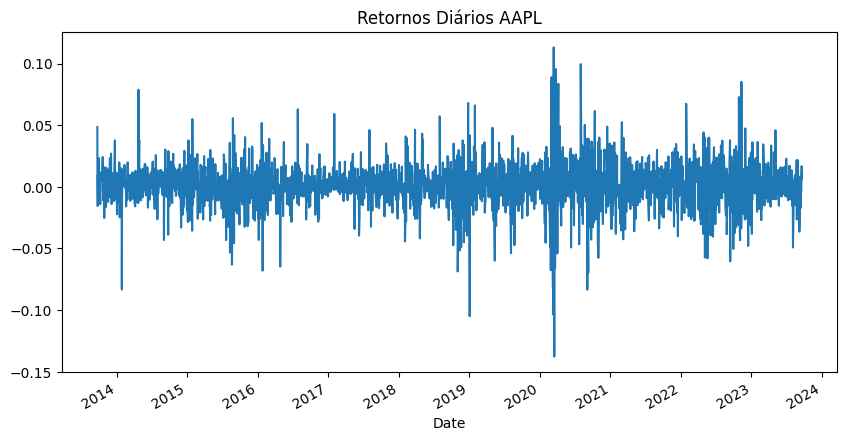

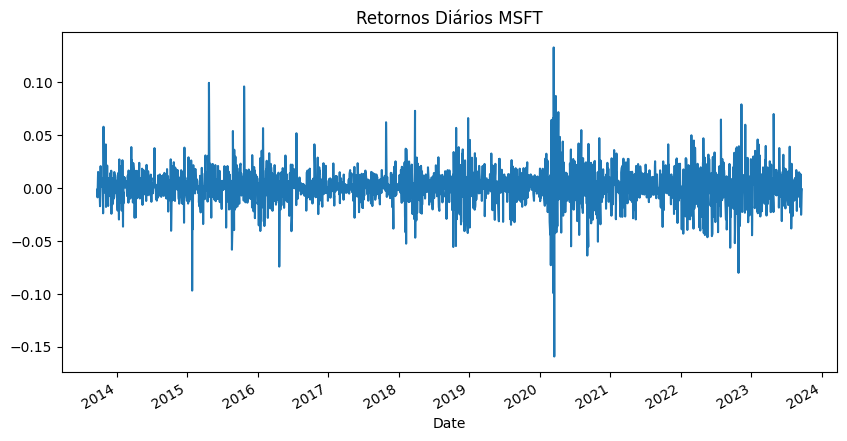

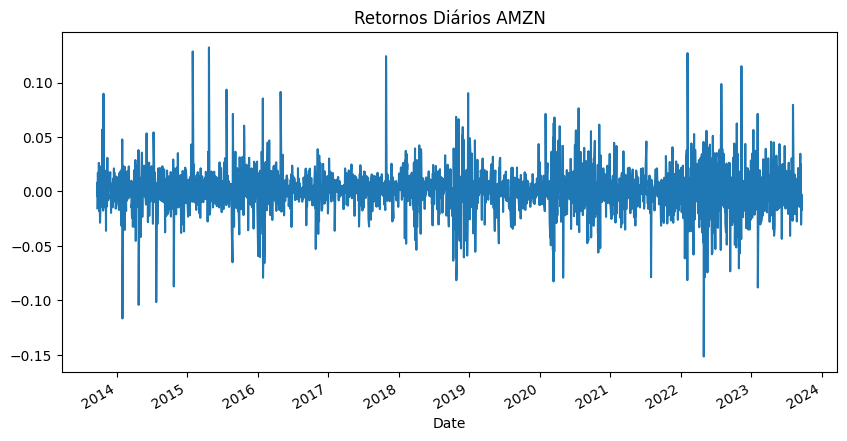

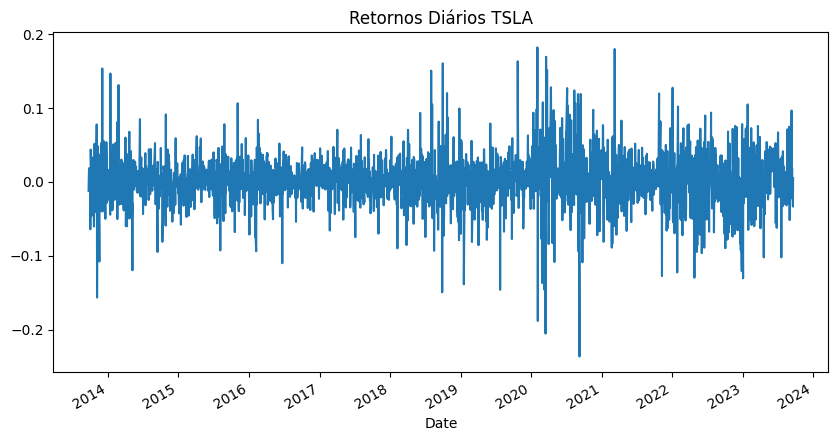

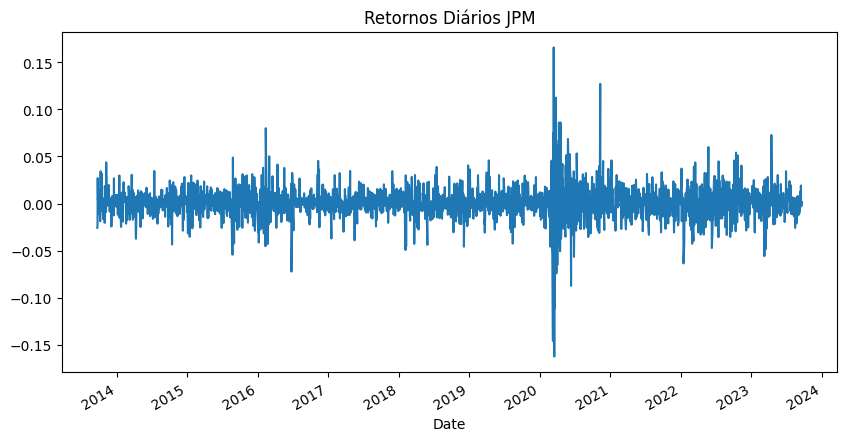

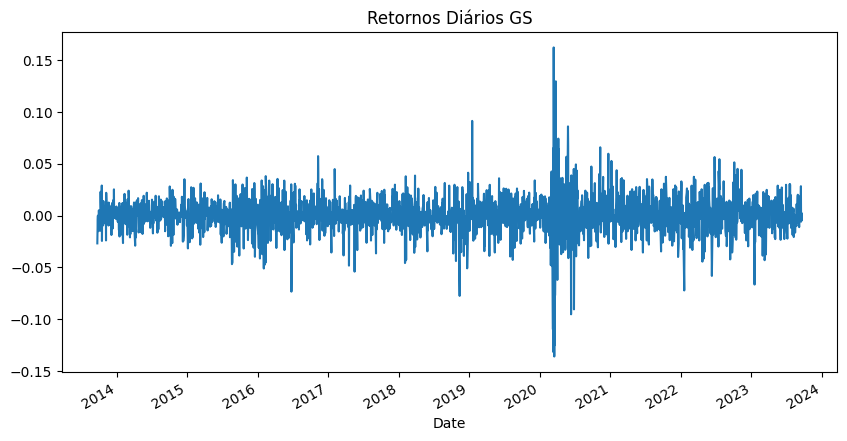

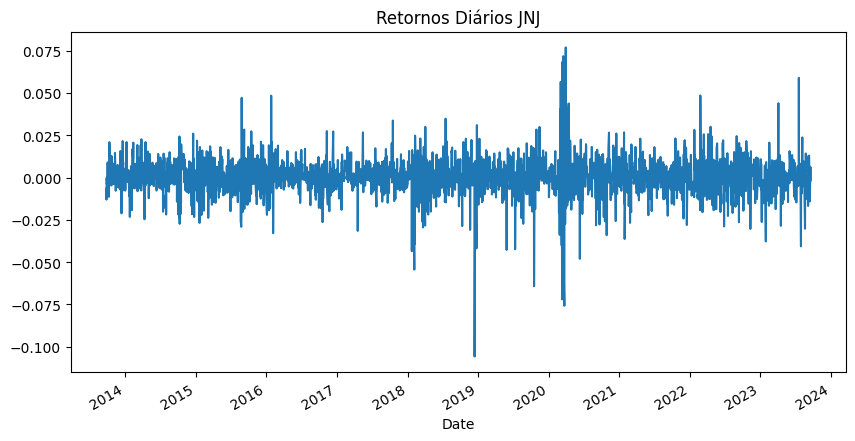

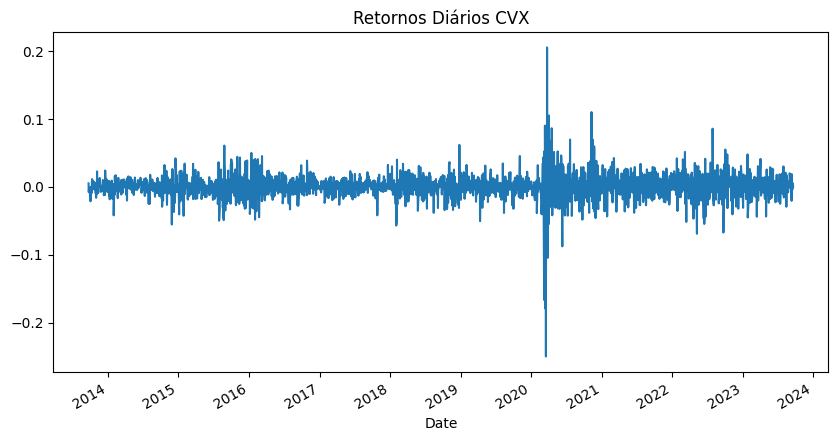

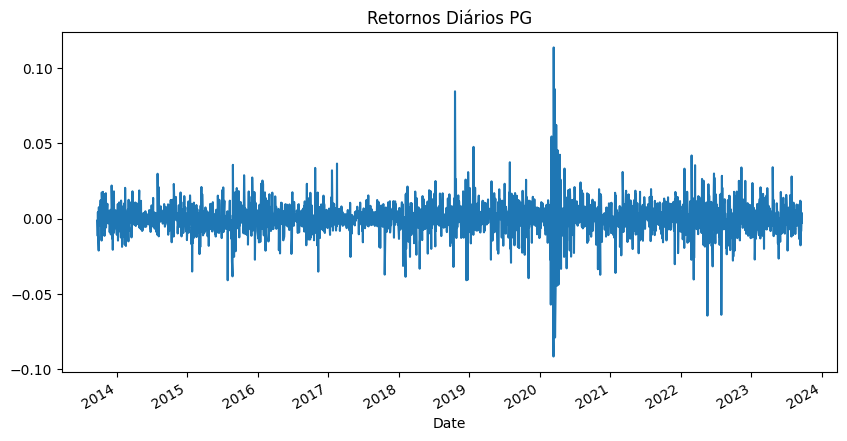

In [60]:
for ticker in tickers:
  log_returns[ticker].plot(figsize=(10, 5))
  plt.title(f"Retornos Diários {ticker}")
  plt.show()

Para compreender melhor o comportamento dos retornos diários, podemos plotar a distribuição desses retornos junto com a curva de distribuição normal. Essa abordagem nos ajuda a visualizar como os retornos se alinham com uma distribuição normal, que é uma suposição comum em muitos modelos financeiros. Desvios significativos da curva normal podem indicar "caudas grossas", o que significa que eventos extremos são mais prováveis do que o previsto por uma distribuição normal.

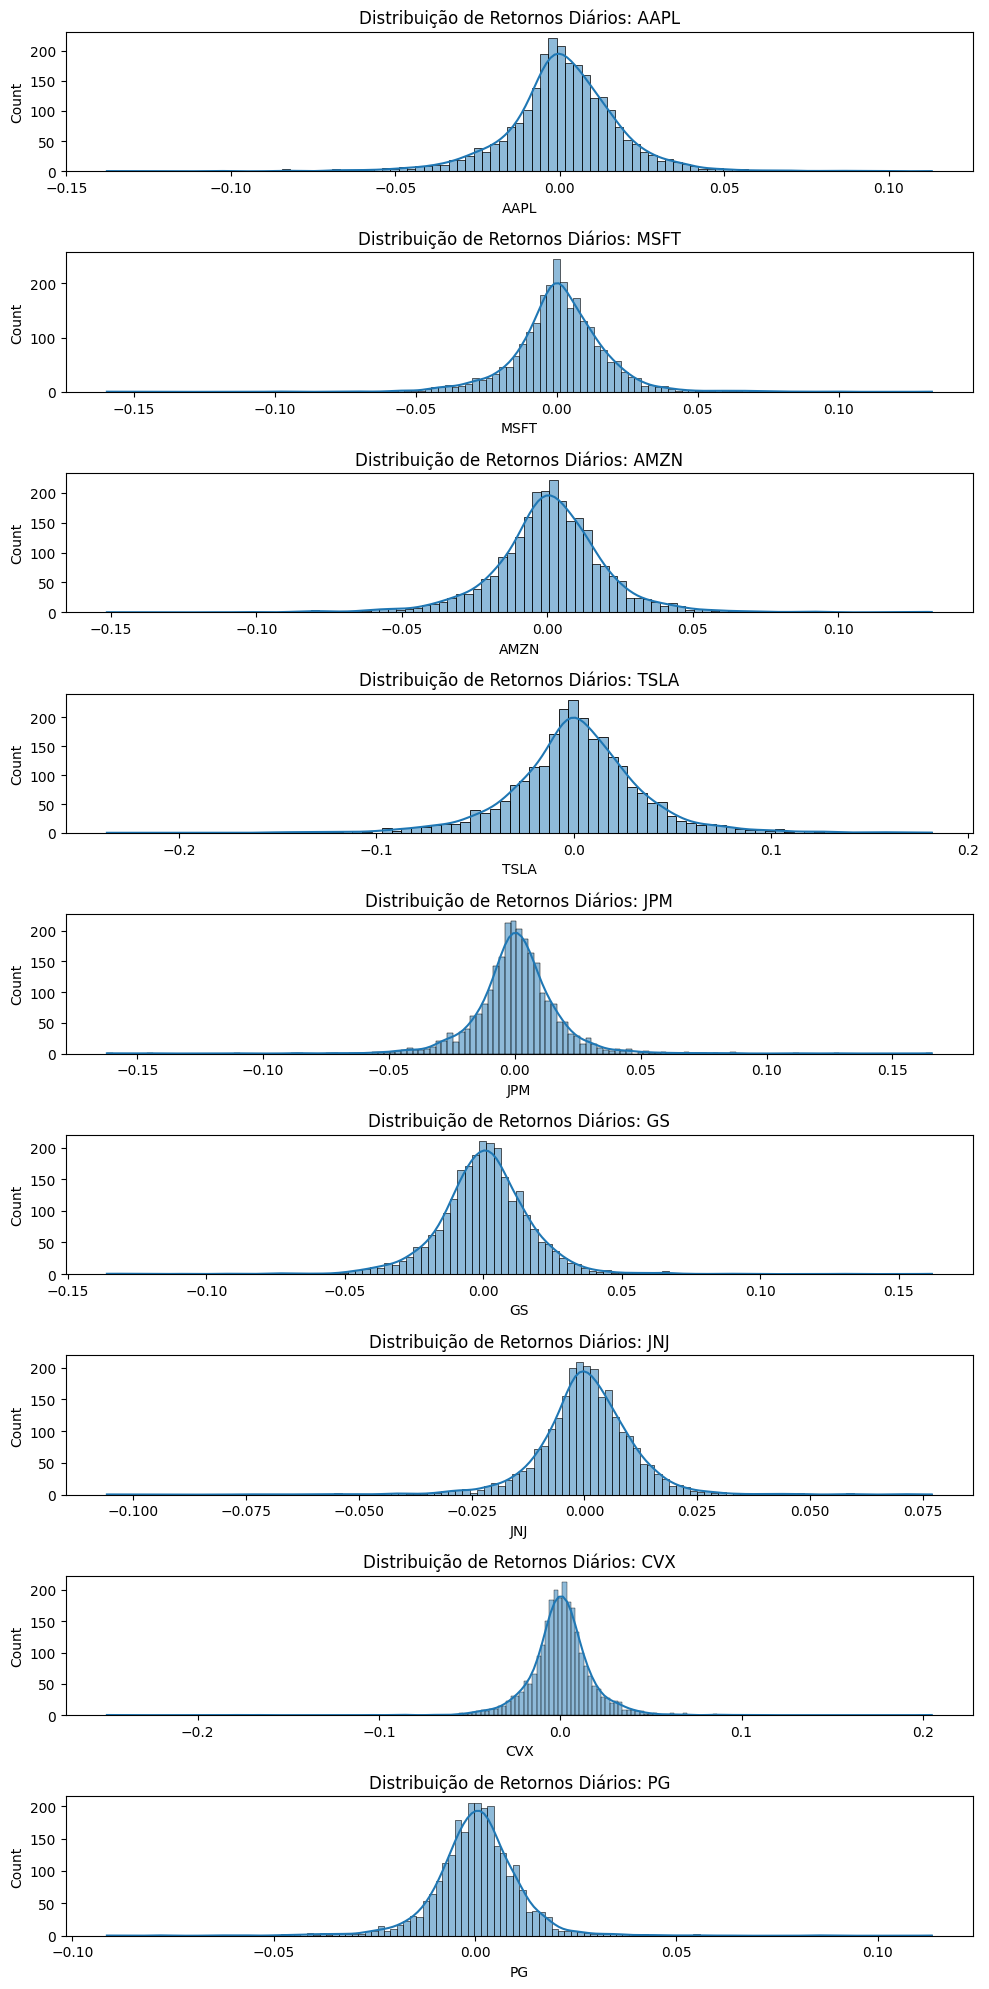

In [61]:
# Criando um grid de subplots
fig, axs = plt.subplots(len(tickers), figsize=(10, 20))

# Loop para criar um histograma de retornos para cada ação
for i, ticker in enumerate(tickers):
    sns.histplot(log_returns[ticker].dropna(), ax=axs[i], kde=True)
    axs[i].set_title(f"Distribuição de Retornos Diários: {ticker}")

# Ajustando o layout
plt.tight_layout()
plt.show()

###Correlação
O gráfico de correlação nos fornece insights imediatos sobre as relações lineares entre diferentes ativos em nosso portfólio. Valores próximos de 1 indicam alta correlação positiva, significando que os ativos tendem a se mover juntos na mesma direção. Valores próximos de -1 indicam alta correlação negativa, ou seja, os ativos tendem a se mover em direções opostas. Uma correlação próxima de zero sugere pouca ou nenhuma relação linear.

Entender essas correlações é crucial para a diversificação e gestão de risco. Se todos os seus ativos estão altamente correlacionados positivamente, você está efetivamente apostando em uma única tendência do mercado, o que aumenta seu risco. Portanto, é frequentemente desejável incluir ativos com baixa ou até mesmo correlação negativa no portfólio para obter um equilíbrio mais eficiente entre risco e retorno.

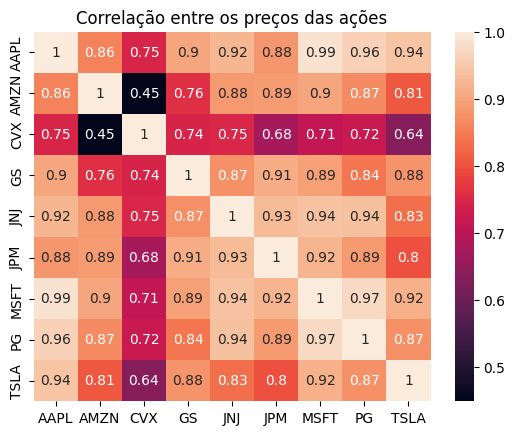

In [62]:
corr_matrix = data['Adj Close'].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlação entre os preços das ações")
plt.grid(False)
plt.show()

Com base na matriz de correlação, podemos ver alguns padrões interessantes que podem ser muito úteis para estratégias de portfólio e gerenciamento de risco:

AAPL e MSFT: A correlação mais alta (0.985) está entre Apple (AAPL) e Microsoft (MSFT), o que faz sentido, já que ambas são gigantes da tecnologia e tendem a se mover juntas em resposta a notícias ou tendências do setor.

AMZN e CVX: A correlação mais baixa (0.449) ocorre entre Amazon (AMZN) e Chevron (CVX), um gigante do comércio eletrônico e uma empresa de energia, respectivamente. A diversificação entre essas duas ações pode oferecer um bom equilíbrio em um portfólio.

Setores Financeiros (GS e JPM): Goldman Sachs (GS) e JPMorgan (JPM) também têm uma correlação alta (0.910), o que é esperado, já que ambas são grandes instituições financeiras.

Produtos de Consumo e Saúde (JNJ e PG): Johnson & Johnson (JNJ) e Procter & Gamble (PG) têm uma alta correlação (0.939), indicando que movem-se de maneira similar, provavelmente reagindo às mesmas condições econômicas ou de mercado.

TSLA: Tesla tem uma correlação menor com Chevron (CVX) (0.637) em comparação com sua correlação com Apple (AAPL) (0.942). Isso pode indicar que Tesla tem características mistas, se comportando tanto como uma empresa de tecnologia quanto como uma relacionada a energia/commodities.

###Otimização do Porfólio
Para criar uma carteira otimizada, seguimos os seguintes passos:

Dados: Utilizamos os preços de fechamento ajustados das ações na nossa carteira.

Simulação: Executamos 5000 simulações de carteiras com diferentes alocações de ativos. Para cada simulação, randomizamos os pesos das ações na carteira.

Retorno e Volatilidade: Calculamos o retorno esperado e a volatilidade para cada carteira simulada. Utilizamos os retornos logarítmicos anualizados e a covariância entre os ativos para isso.

Razão de Sharpe: Avaliamos a eficiência de cada carteira usando a razão de Sharpe, que é o retorno esperado dividido pela volatilidade.

Escolha da Carteira: Identificamos a carteira com a maior razão de Sharpe, considerando-a como a carteira otimizada.

Visualização: Plotamos todas as carteiras simuladas em um gráfico de dispersão, com a volatilidade no eixo X e o retorno no eixo Y. Utilizamos a razão de Sharpe para colorir os pontos.

Detalhes da Carteira Otimizada: Extraímos os pesos dos ativos na carteira otimizada e exibimos em um gráfico de pizza para uma melhor visualização da alocação.



In [65]:
# # Selecionando apenas os preços de fechamento ajustados
adj_close = data['Adj Close']
np.random.seed(42)
num_portfolios = 5000
all_weights = np.zeros((num_portfolios, len(adj_close.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for x in range(num_portfolios):
    # Pesos
    weights = np.array(np.random.random(len(tickers)))
    weights = weights / np.sum(weights)

    # Salvando os pesos
    all_weights[x, :] = weights

    # Retorno esperado
    ret_arr[x] = np.sum((log_returns.mean() * weights * 252))

    # Volatilidade esperada
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    # Razão de Sharpe
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

O gráfico abaixo é um scatter plot que representa diversas carteiras simuladas, com a volatilidade no eixo X e o retorno esperado no eixo Y. Cada ponto no gráfico representa uma carteira única com uma combinação específica de ativos.

Cores: As cores dos pontos são determinadas pela Razão de Sharpe de cada carteira. Cores mais claras indicam uma razão de Sharpe mais alta, ou seja, maior eficiência.

Eixos:

Eixo X (Volatilidade): Quanto mais à direita um ponto estiver, mais volátil é a carteira.
Eixo Y (Retorno): Quanto mais acima um ponto estiver, maior é o retorno esperado da carteira.
Ponto Vermelho: Este é o ponto que representa a carteira com a maior Razão de Sharpe. Esse é geralmente o "ponto doce", onde você obtém o maior retorno para o nível de risco que está disposto a assumir.

Para analisar o gráfico, você normalmente procuraria pontos que estão mais à esquerda e mais acima, preferencialmente com cores mais claras. Isso significaria carteiras com maior retorno, menor risco e eficiência melhorada. O ponto vermelho serve como um marcador para a carteira mais eficiente de acordo com a Razão de Sharpe.

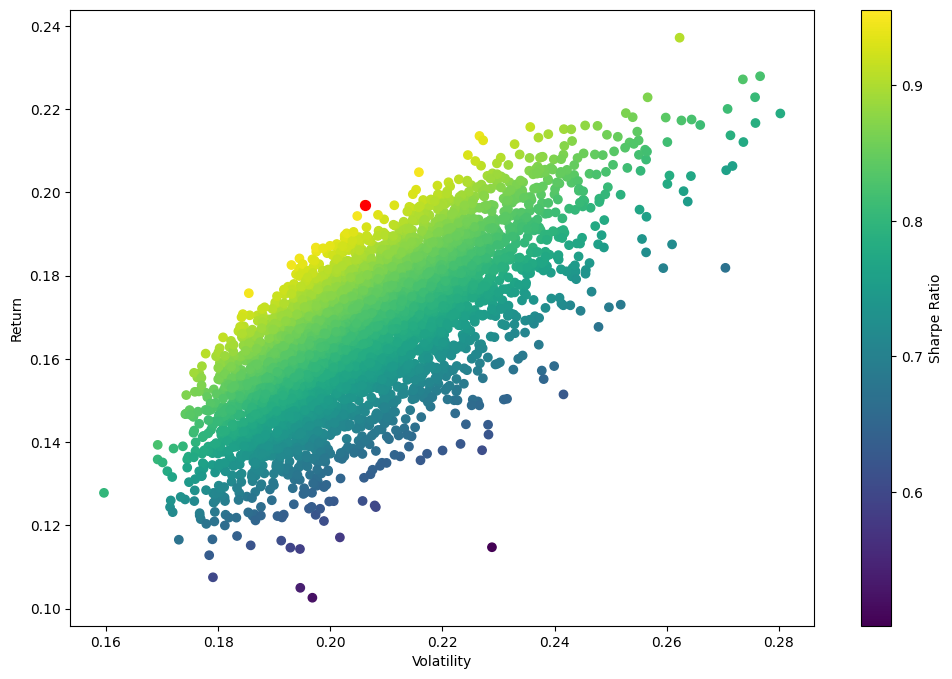

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [69]:
# Visualizando a Volatilidade Esperada da Carteira Ótima
print('Volatilidade Esperada %')
max_sr_vol*100

Volatilidade Esperada %


20.61635915214866

In [68]:
# Visualizando a Retorno Esperado da Carteira Ótima
print('Retorno Esperado %')
max_sr_ret*100

Retorno Esperado %


19.7009631711123

In [71]:
# Extraindo os pesos de cada ação da carteira ótima
max_sr_weights = all_weights[sharpe_arr.argmax(), :]

# Criando um DataFrame para melhor visualização
asset_allocation = pd.DataFrame(data = {'assets': tickers, 'weights': max_sr_weights})
asset_allocation.set_index('assets', inplace=True)
asset_allocation

,weights
assets,
AAPL,0.197016
MSFT,0.158829
AMZN,0.003109
TSLA,0.043296
JPM,0.082226
GS,0.056167
JNJ,0.231371
CVX,0.156609
PG,0.071376


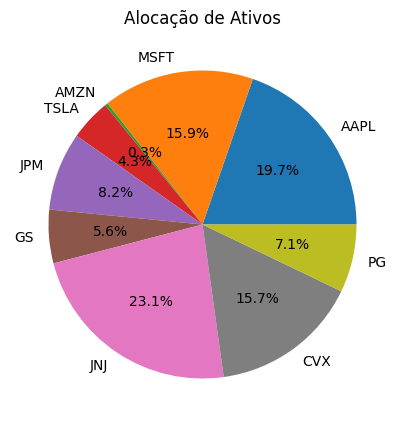

In [55]:
# Convertendo pesos em porcentagens
asset_allocation['weights'] = asset_allocation['weights']*100

# Plotando um gráfico de pizza
plt.figure(figsize=(10,5))
plt.pie(asset_allocation['weights'], labels = asset_allocation.index, autopct='%1.1f%%')
plt.title('Alocação de Ativos')
plt.show()

O código abaixo realiza uma simulação de Monte Carlo para prever o comportamento futuro de um portfólio de investimentos. Ele faz o seguinte:

Inicialização: Começa com um investimento inicial de $1000 e configura 1000 simulações para um ano (252 dias úteis de negociação).

Simulação: Para cada simulação e cada dia, ele calcula um retorno diário aleatório baseado na média e desvio padrão dos retornos diários das ações na carteira. Em seguida, usa esse retorno para projetar o valor do portfólio para o dia seguinte.

Armazenamento de Resultados: Cada série temporal de preços simulados é armazenada em uma matriz simulated_portfolios.

Percentis: Calcula o percentil 90 e 10 para cada dia, dando uma faixa onde 80% dos cenários se encontram.

Gráfico: Plota todas as trajetórias de simulação em cinza, a mediana em vermelho e a área entre os percentis 10 e 90 em azul.

Importância:
Risco e Retorno: Fornece uma distribuição de resultados possíveis, ajudando você a entender o risco e o retorno potenciais.

Decisão de Investimento: Pode ser usado para avaliar se o nível de risco é aceitável em relação aos retornos potenciais.

Planejamento: Ajuda no planejamento financeiro, fornecendo uma gama de cenários possíveis.

Resumindo, a simulação de Monte Carlo é uma ferramenta poderosa para entender a incerteza associada ao futuro desempenho do seu portfólio.

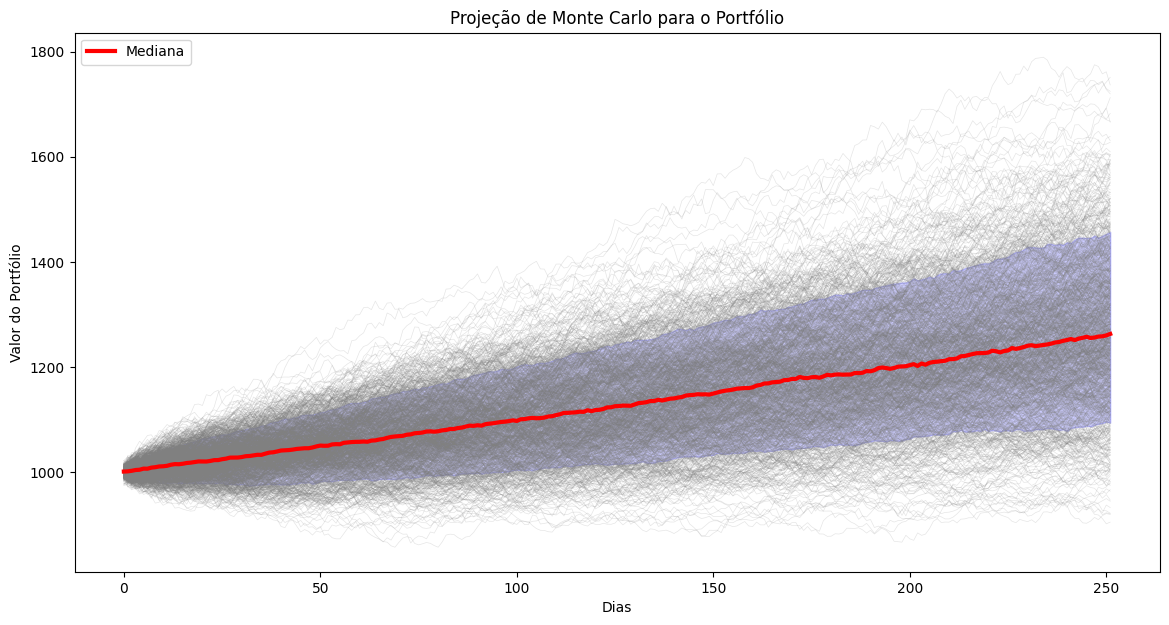

In [70]:
# Parâmetros
days_in_future = 252  # Supondo uma projeção de 1 ano
monte_carlo_simulations = 1000 # Número de simulações a serem geradas

simulated_portfolios = np.zeros((days_in_future, monte_carlo_simulations))

initial_investment = 1000 # Exemplo de um investimento inicial

for x in range(monte_carlo_simulations):
    simulated_prices = [initial_investment]
    for day in range(days_in_future):
        daily_return = np.sum(np.random.normal(loc=mean_daily_returns, scale=std_daily_returns) * max_sr_weights)
        simulated_price = simulated_prices[-1] * (1 + daily_return)
        simulated_prices.append(simulated_price)
    simulated_portfolios[:, x] = simulated_prices[1:]

# Calculando percentis para as áreas sombreadas
upper_percentile_90 = np.percentile(simulated_portfolios, 90, axis=1)
lower_percentile_10 = np.percentile(simulated_portfolios, 10, axis=1)
median = np.median(simulated_portfolios, axis=1)

plt.figure(figsize=(14, 7))

# Plotando trajetórias, médias e percentis
for x in range(monte_carlo_simulations):
    plt.plot(simulated_portfolios[:, x], color='grey', alpha=0.2, linewidth=0.5)

plt.plot(median, color='red', linewidth=3, label="Mediana")
plt.fill_between(range(days_in_future), upper_percentile_90, lower_percentile_10, color='blue', alpha=0.2)
plt.title("Projeção de Monte Carlo para o Portfólio")
plt.xlabel("Dias")
plt.ylabel("Valor do Portfólio")
plt.legend()
plt.show()
